In [1]:
#import necessary packages
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict

In [2]:
G = nx.les_miserables_graph()

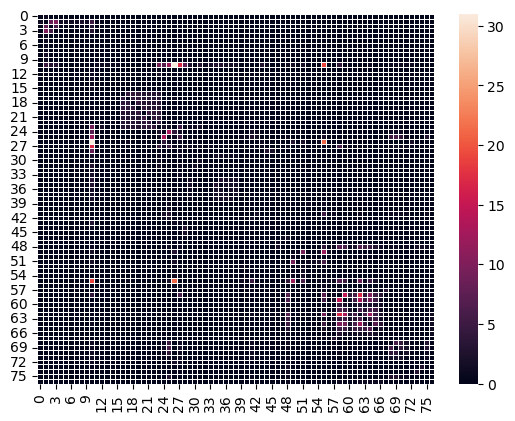

In [3]:
A = nx.adjacency_matrix(G).toarray()
import seaborn as sns
ax = sns.heatmap(A, linewidth=0.5)
plt.show()

In [11]:
A1or0 = (A > 0).astype(np.float32)
print(A1or0)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


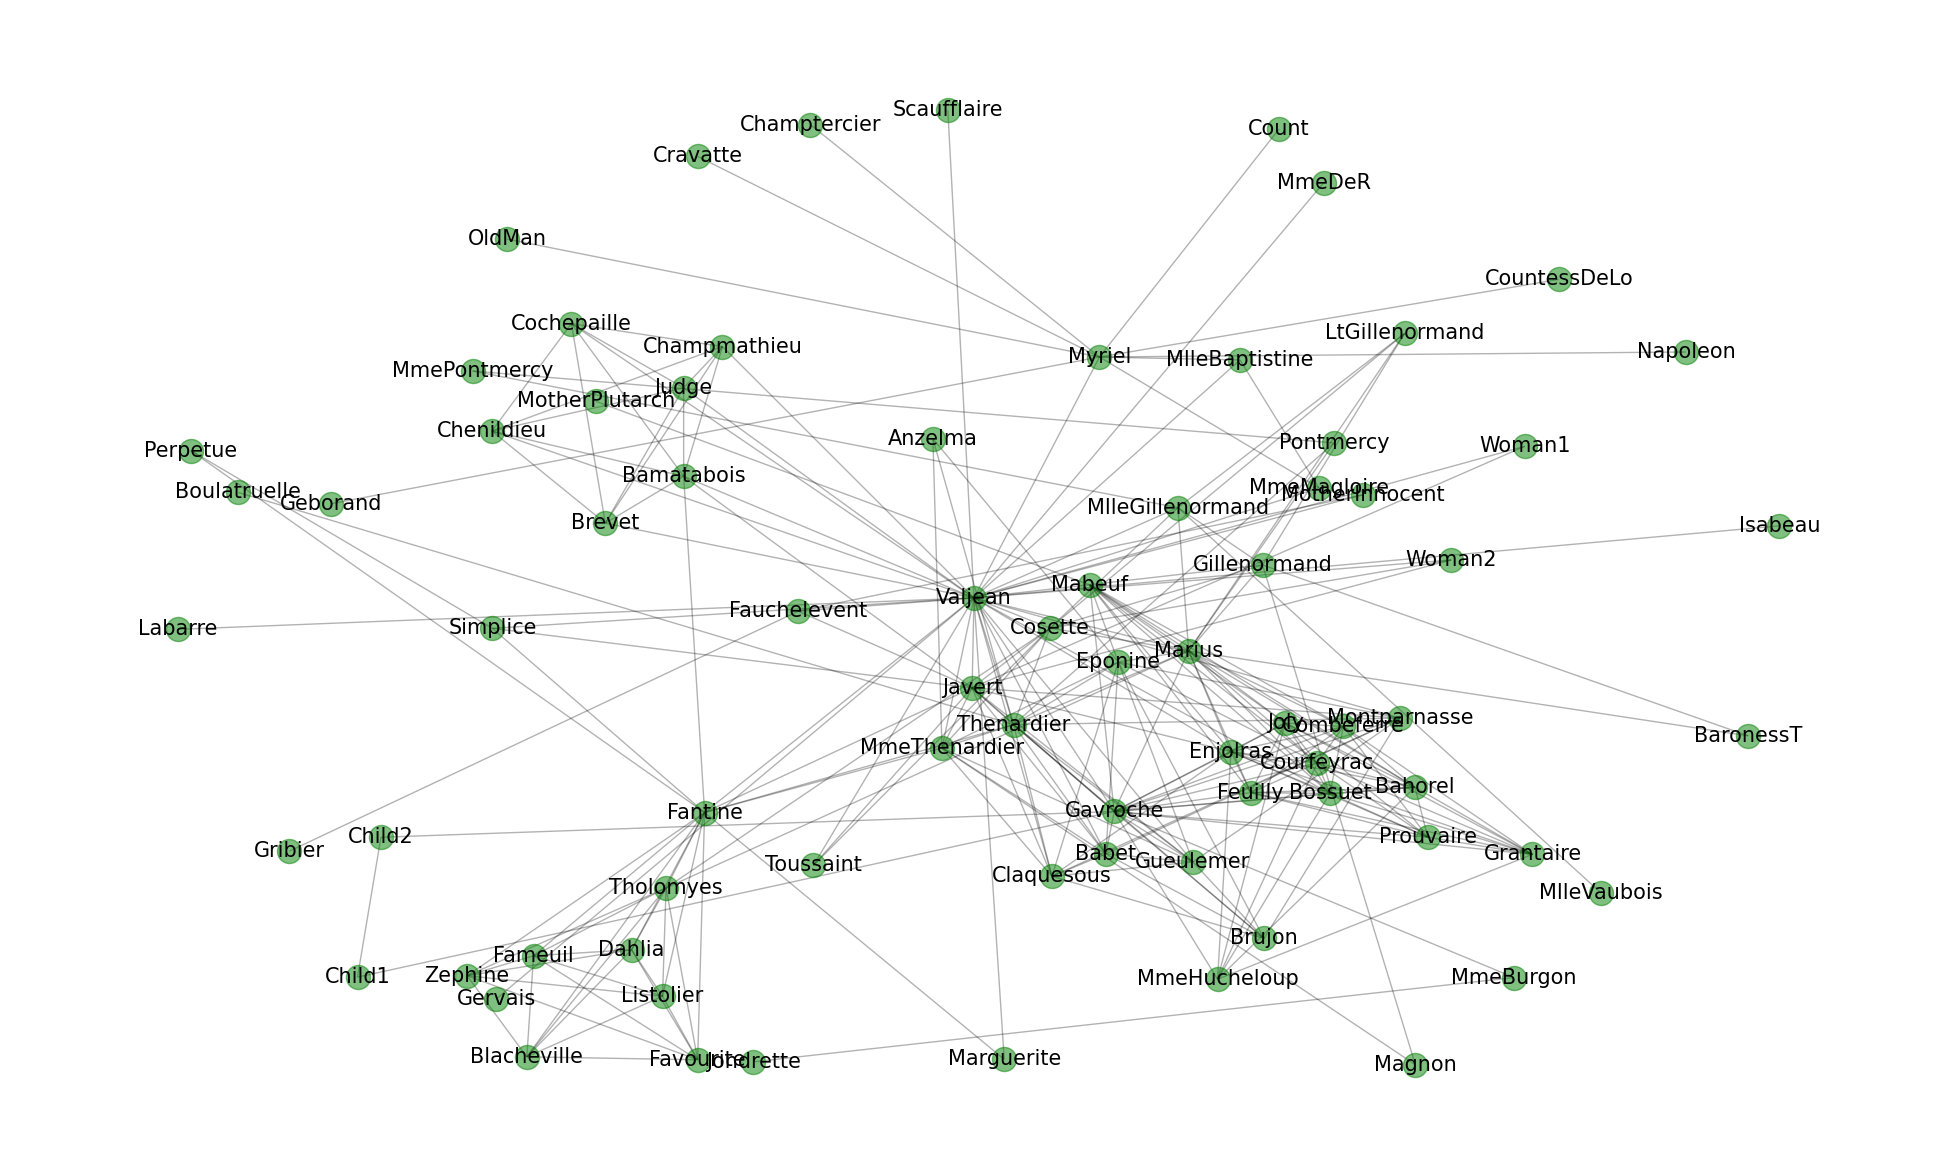

In [8]:
#Graph Visualization
fig,ax = plt.subplots(figsize=(25,15))
ax.axis('off')
pos = nx.fruchterman_reingold_layout(G, k=1.0, iterations=60)
nx.draw_networkx_nodes(G, pos, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.3) #change edges style
labels = dict([(n, n) for n in G.nodes])
_ = nx.draw_networkx_labels(G, pos, labels=labels, font_color='black',font_size=15)
V = [n for n in G.nodes]
V = np.array(V)
plt.savefig("general.pdf")

In [24]:
degrees = np.sum(A, axis=1)
sort_idcs_by_degrees = np.argsort(-degrees)
print({v:deg for v,deg in zip(V[sort_idcs_by_degrees], degrees[sort_idcs_by_degrees])})

{'Valjean': 158, 'Marius': 104, 'Enjolras': 91, 'Courfeyrac': 84, 'Combeferre': 68, 'Cosette': 68, 'Bossuet': 66, 'Thenardier': 61, 'Gavroche': 56, 'Fantine': 47, 'Javert': 47, 'Joly': 43, 'Bahorel': 39, 'Feuilly': 38, 'MmeThenardier': 34, 'Myriel': 31, 'Gillenormand': 29, 'Babet': 27, 'Tholomyes': 26, 'Favourite': 26, 'Dahlia': 25, 'Gueulemer': 25, 'Blacheville': 25, 'Fameuil': 24, 'Zephine': 24, 'Listolier': 24, 'MlleGillenormand': 23, 'Claquesous': 20, 'Eponine': 19, 'MmeMagloire': 19, 'Prouvaire': 19, 'MlleBaptistine': 17, 'Mabeuf': 16, 'Grantaire': 16, 'Fauchelevent': 14, 'Judge': 14, 'Champmathieu': 14, 'Brujon': 13, 'Montparnasse': 12, 'Brevet': 11, 'Chenildieu': 11, 'Bamatabois': 11, 'Cochepaille': 11, 'Simplice': 8, 'MmeHucheloup': 7, 'Child2': 5, 'Woman2': 5, 'Anzelma': 5, 'Child1': 5, 'LtGillenormand': 5, 'MotherInnocent': 4, 'Toussaint': 4, 'Pontmercy': 3, 'MmeBurgon': 3, 'Marguerite': 3, 'MotherPlutarch': 3, 'Perpetue': 3, 'Woman1': 3, 'Gribier': 2, 'BaronessT': 2, 'MmePon

In [19]:
for i, l1 in enumerate(V):
    for j in range(i):
        if G.get_edge_data(V[i], V[j]):
            # nx.set_edge_attributes(G, {(labels[i], labels[j]): {"capacity":  -G.get_edge_data(labels[i], labels[j])['weight']}})
            nx.set_edge_attributes(G, {(V[i], V[j]): {"capacity":  1}})
    

In [20]:
min_cut, partition = nx.algorithms.flow.minimum_cut(G,"Javert","Valjean")

In [13]:
def visualize_two_partition(partition_1, partition_2, layout, G):
    labels = dict([(n, n) for n in G.nodes])
    fig,ax = plt.subplots(figsize=(25,15))
    ax.axis('off')
    pos = layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=partition_1, node_color='#ccccff', alpha=0.5)
    nx.draw_networkx_nodes(G, pos, nodelist=partition_2, node_color='#ffcccc', alpha=0.5)
    nx.draw_networkx_labels(G,pos,font_size=13,labels=labels)
    nx.draw_networkx_edges(G,pos,alpha=0.25)


In [ ]:
visualize_two_partition(partition[0], partition[1], nx.kamada_kawai_layout, G)

In [9]:
def fiedler_analysis(A):
    D = np.diag(A.sum(1))
    L = D - A
    L_eigval, L_eigvec = np.linalg.eig(L)
    sorting = np.argsort(L_eigval)
    L_eigval = L_eigval[sorting]
    L_eigvec = L_eigvec[:,sorting]

    Fiedler = L_eigvec[:,1]
    Fiedler_sorting = np.argsort(Fiedler)

    fig,ax = plt.subplots(figsize=(25,10))
    _ = ax.scatter(list(range(len(L_eigval))), Fiedler[Fiedler_sorting], s=150, alpha=0.5)
    # for j in range(len(V)):
    #     ax.annotate(V[Fiedler_sorting[j]],
    #                 (j-0.25, Fiedler[Fiedler_sorting[j]]+5e-4*j),
    #                 size=12)
    _ = ax.axhline(0)
    _ = ax.axhline(np.median(Fiedler), color='red')
    print(f"The smallest eigenvalue = {L_eigval[0].real}")
    print(f"Fiedler eigenvalue = {L_eigval[1].real}")
    return Fiedler, Fiedler_sorting

the second smallest eigenvector can be used to
bipartite the graph into two connected components by taking N−
and N+.

c:\Users\gerry\miniconda3\envs\torch\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\gerry\miniconda3\envs\torch\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


The smallest eigenvalue = -6.3014295871539575e-15
Fiedler eigenvalue = 0.5543602780223371


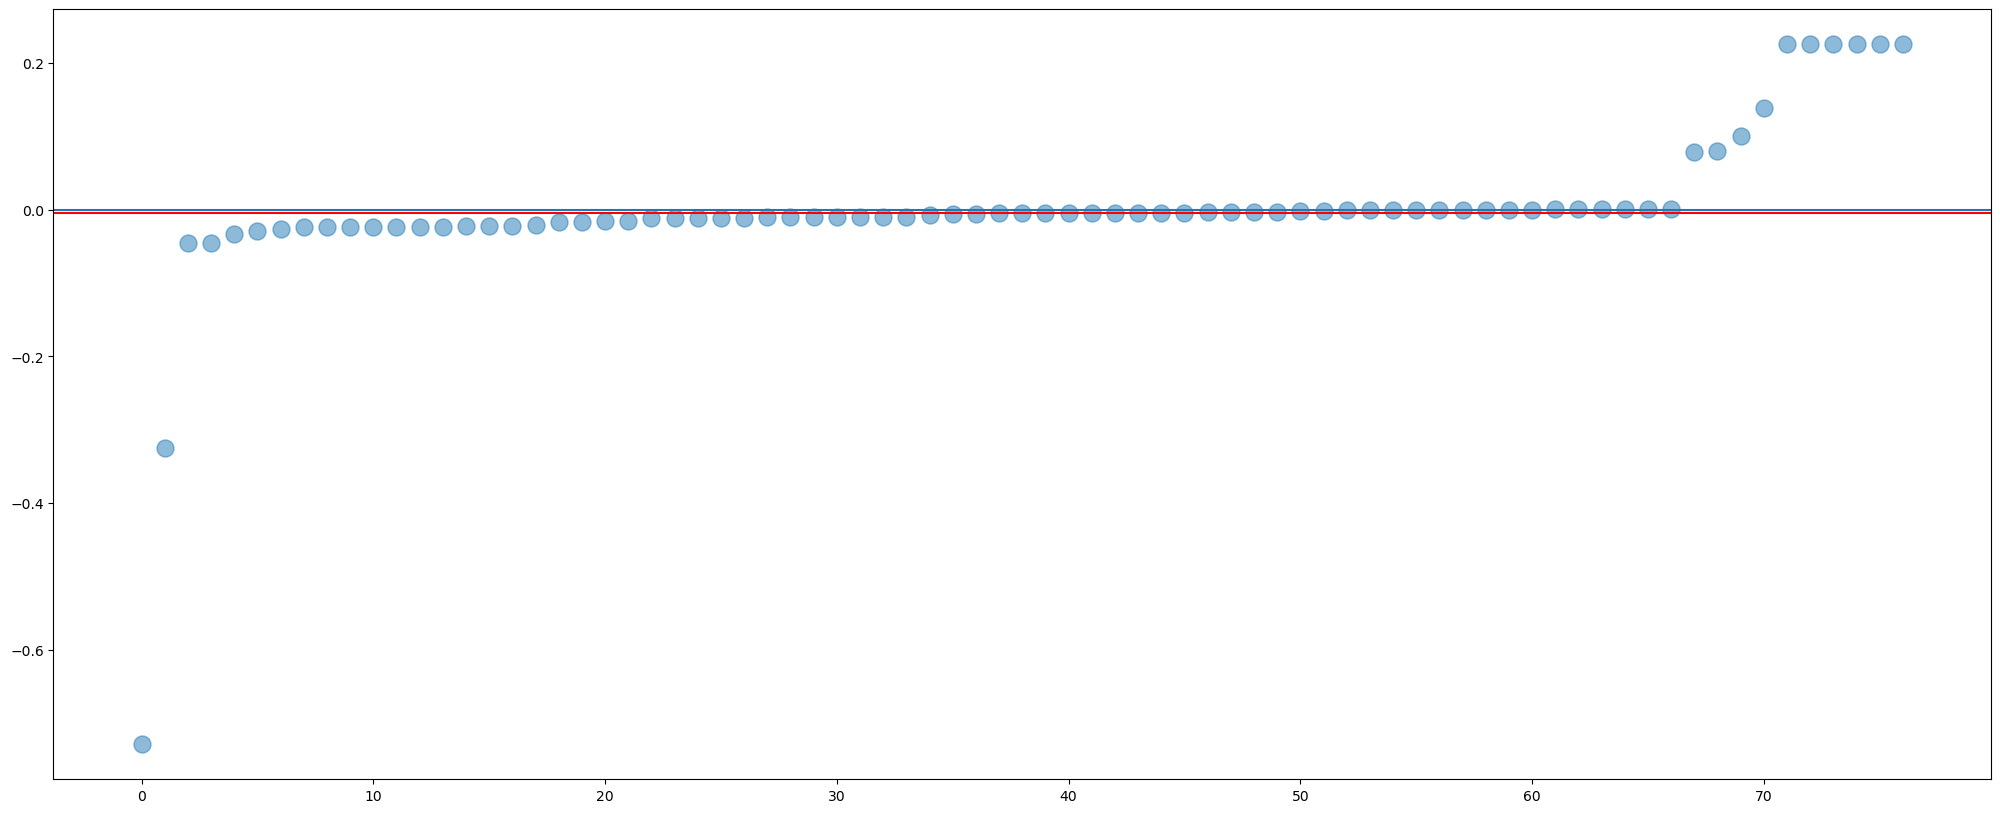

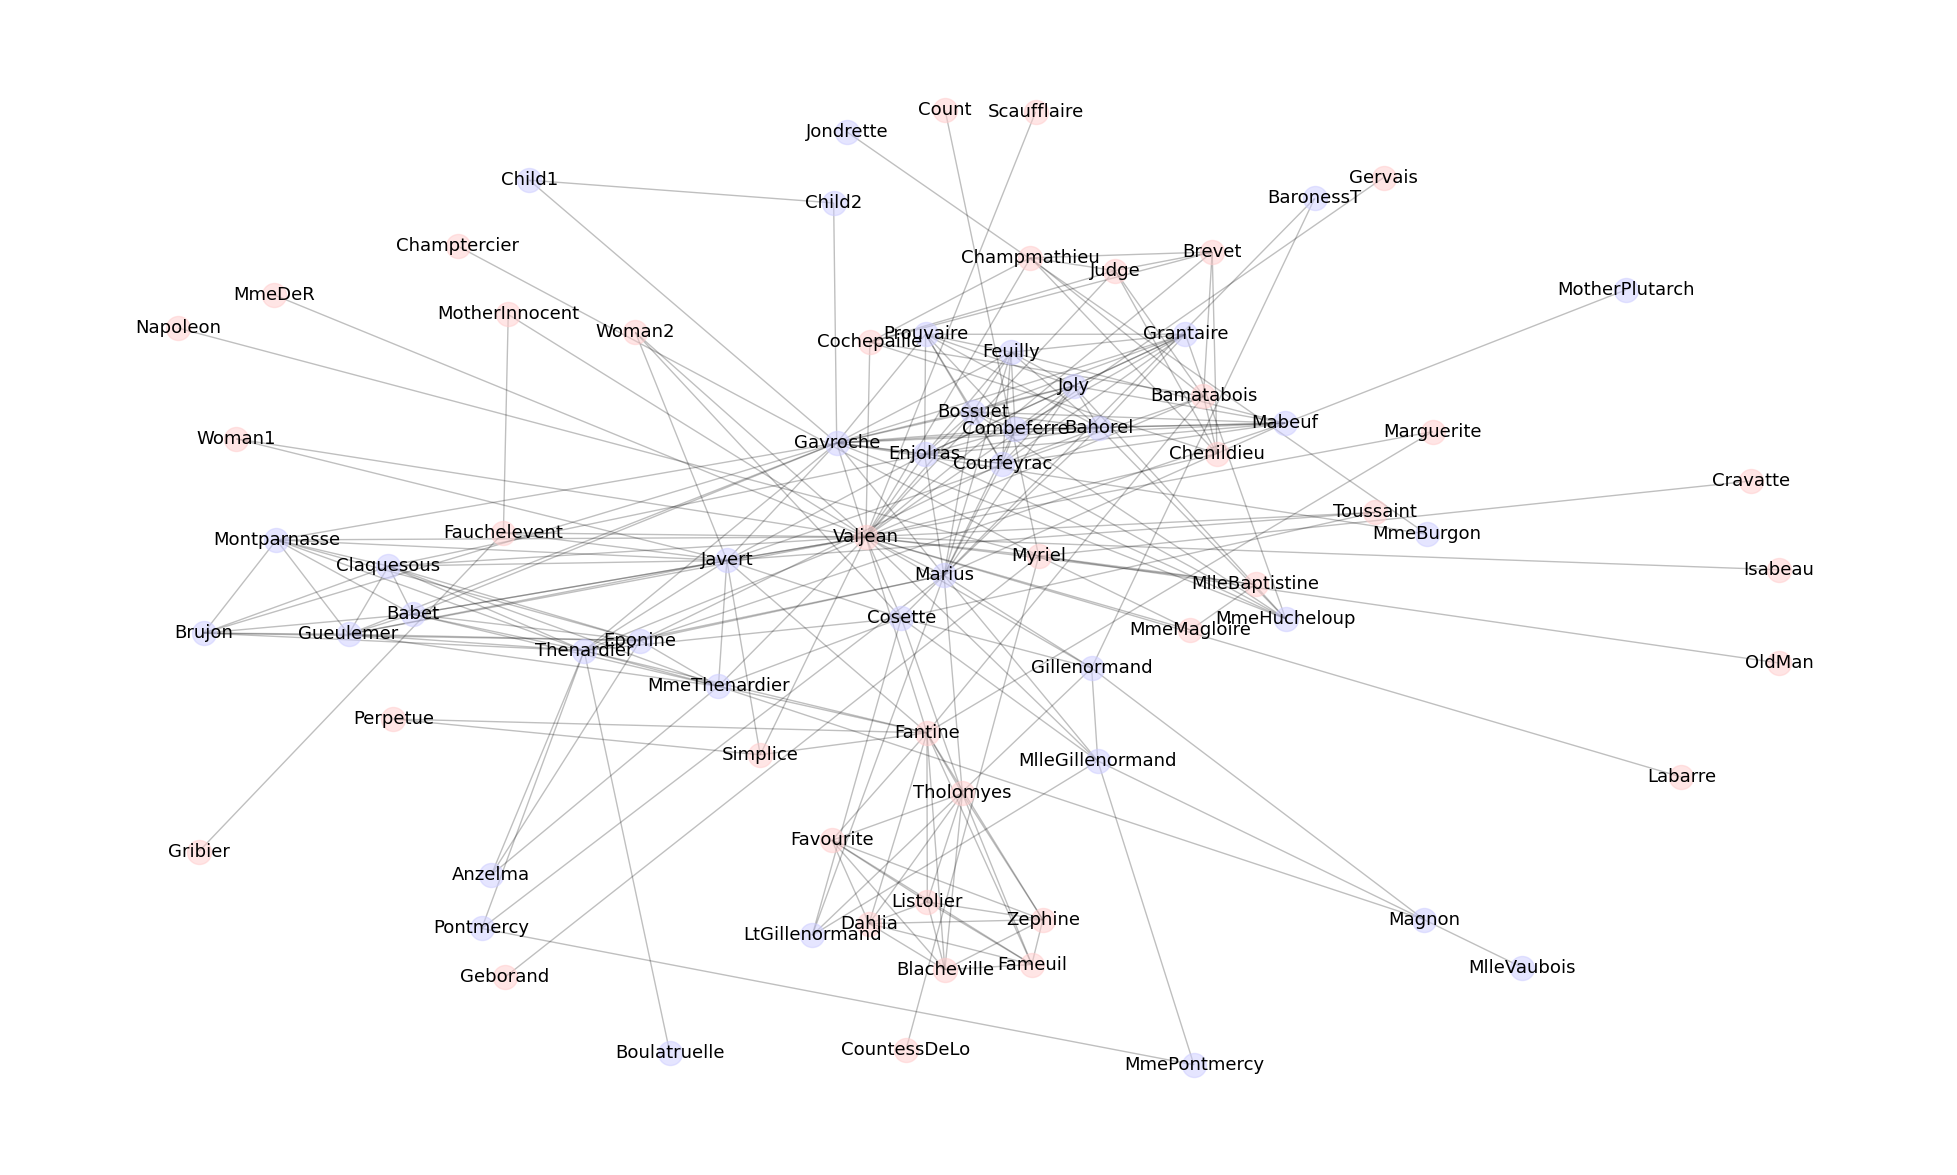

In [14]:
Fiedler, Fiedler_sorting = fiedler_analysis(A)
med = np.sum(Fiedler[Fiedler_sorting] < np.median(Fiedler))
partition_1 = V[Fiedler_sorting[:med]]
partition_2 = V[Fiedler_sorting[med:]]
visualize_two_partition(partition_1, partition_2, lambda G: nx.fruchterman_reingold_layout(G, k=1.0, iterations=60), G)
plt.savefig("fiedler.pdf")

If we work on the adjacency matrix with A_{ij} = 1 when there is a connection instead

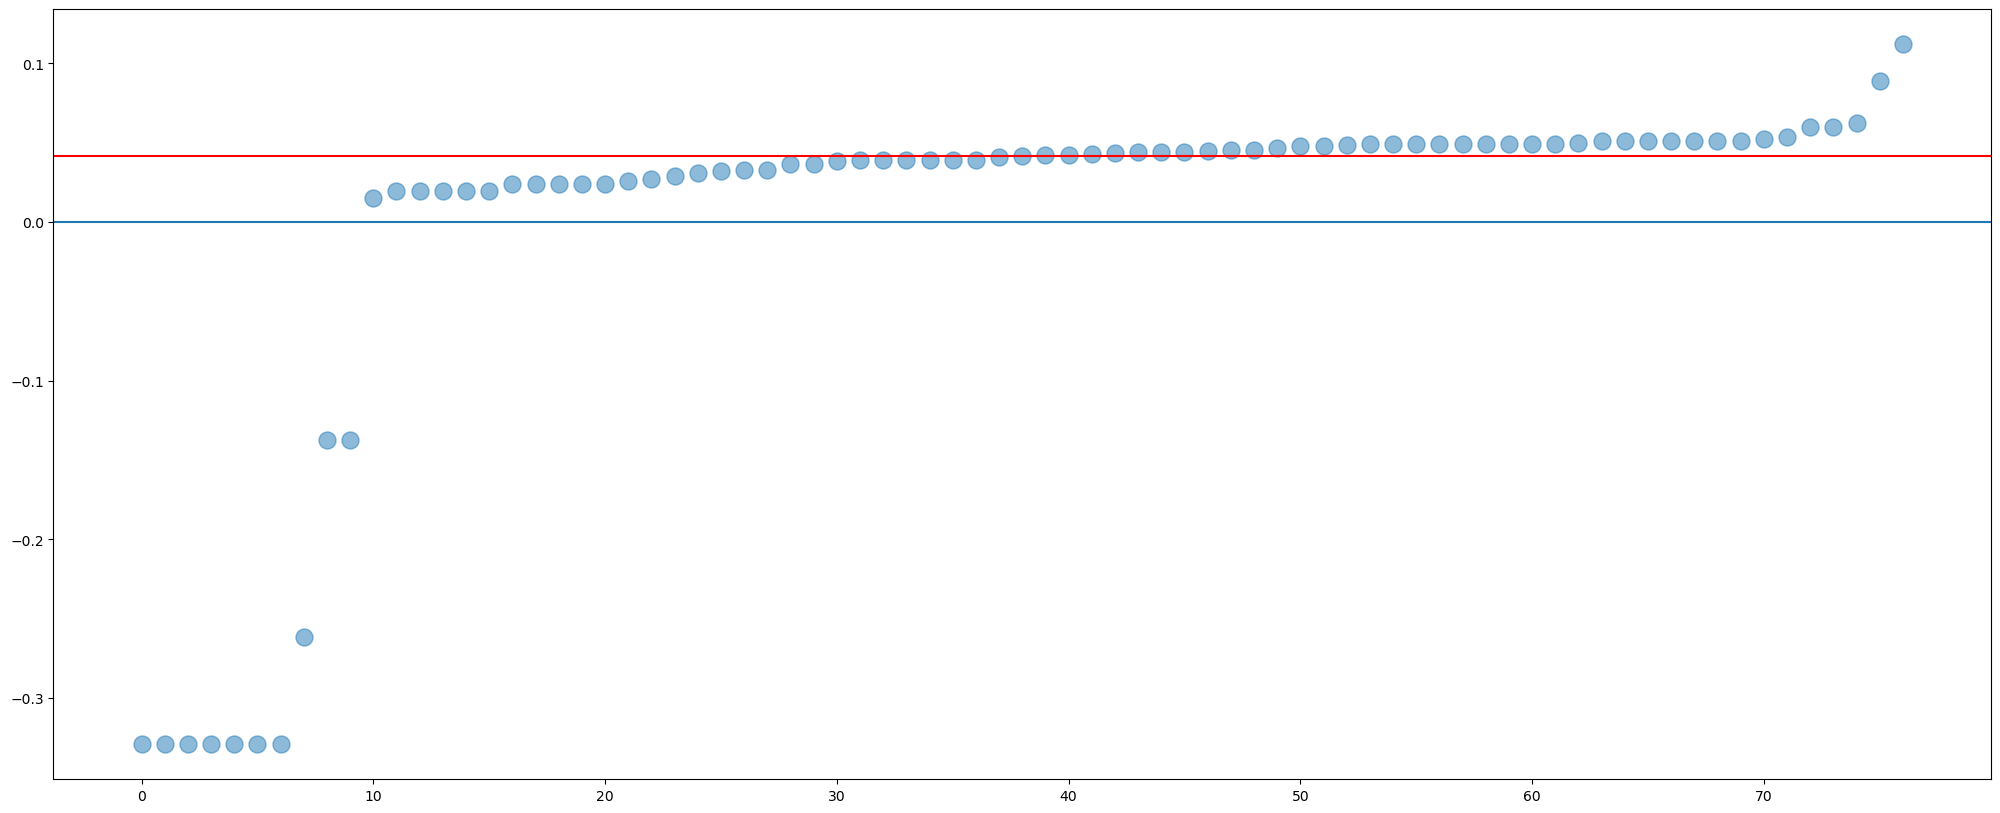

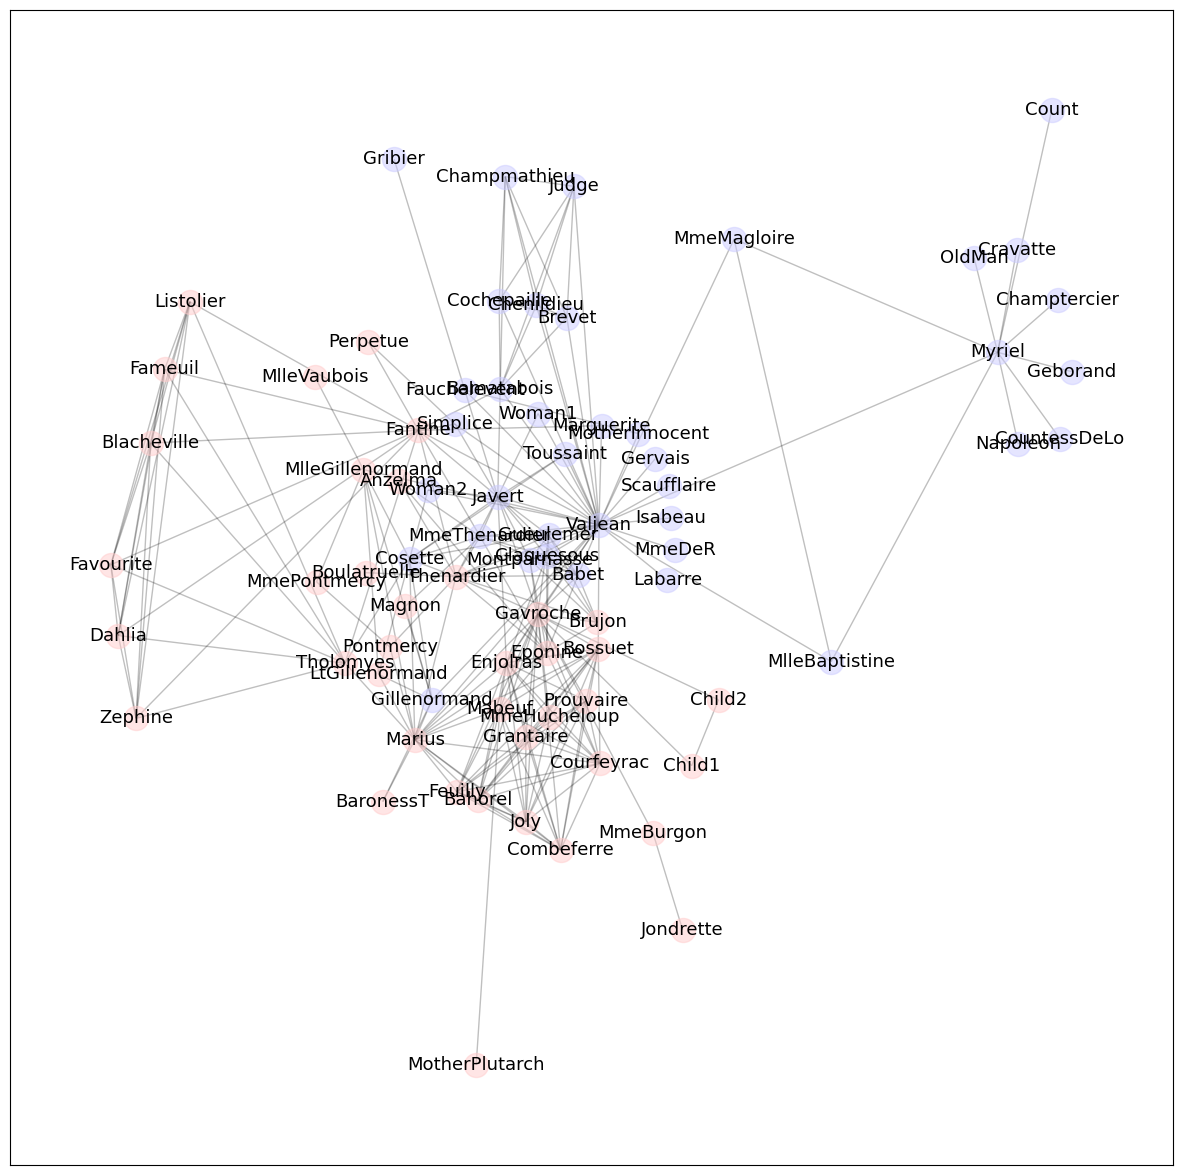

In [68]:
Fiedler, Fiedler_sorting = fiedler_analysis(A1or0)
med = np.sum(Fiedler[Fiedler_sorting] < np.median(Fiedler))
partition_1 = V[Fiedler_sorting[:med]]
partition_2 = V[Fiedler_sorting[med:]]
visualize_two_partition(partition_1, partition_2, nx.kamada_kawai_layout, G)

In [15]:
def ncut_analysis(A):
    D = np.diag(A.sum(1))
    sym = np.sqrt(np.linalg.inv(D))
    L = D - A
    norm_L =  sym @ L @ sym
    norm_L_eigval, norm_L_eigvec = np.linalg.eig(norm_L)
    sorting = np.argsort(norm_L_eigval)
    norm_L_eigval = norm_L_eigval[sorting]
    norm_L_eigvec = norm_L_eigvec[:,sorting]

    Chegger = norm_L_eigvec[:,1]
    Chegger_sorting = np.argsort(Chegger)

    fig,ax = plt.subplots(figsize=(25,10))
    _ = ax.scatter(list(range(len(norm_L_eigval))), Fiedler[Fiedler_sorting], s=150, alpha=0.5)
    # for j in range(len(V)):
    #     ax.annotate(V[Fiedler_sorting[j]],
    #                 (j-0.25, Fiedler[Fiedler_sorting[j]]+5e-4*j),
    #                 size=12)
    _ = ax.axhline(0)
    _ = ax.axhline(np.median(Chegger), color='red')
    return Chegger, Chegger_sorting

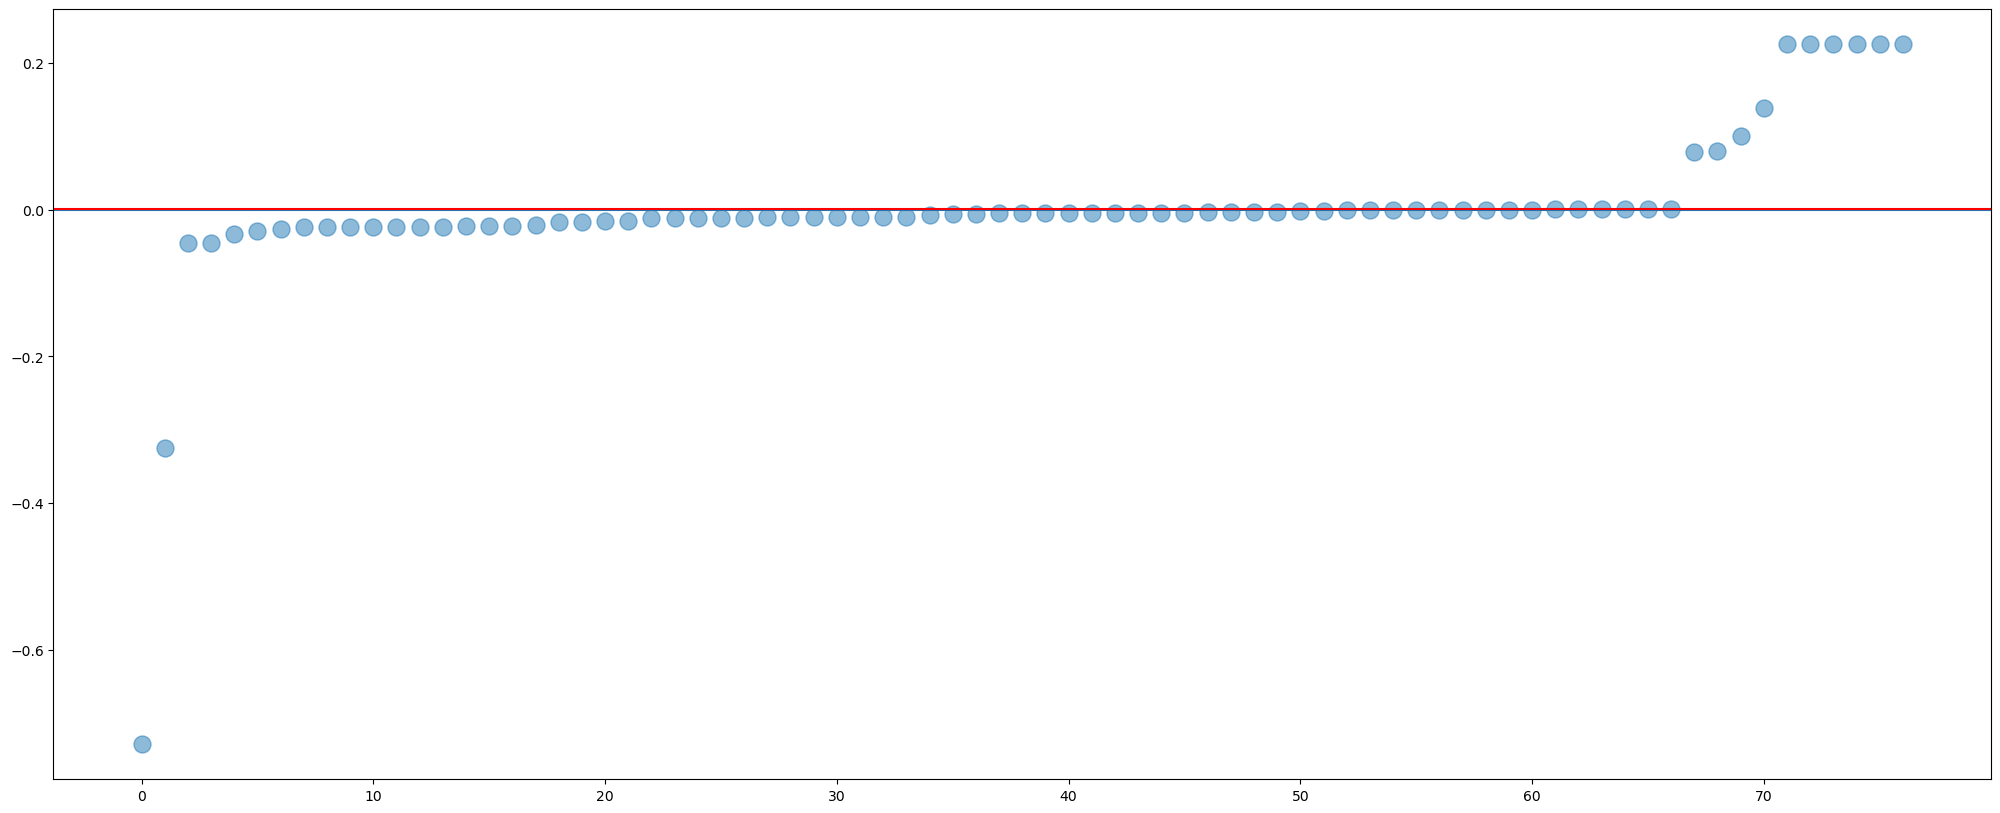

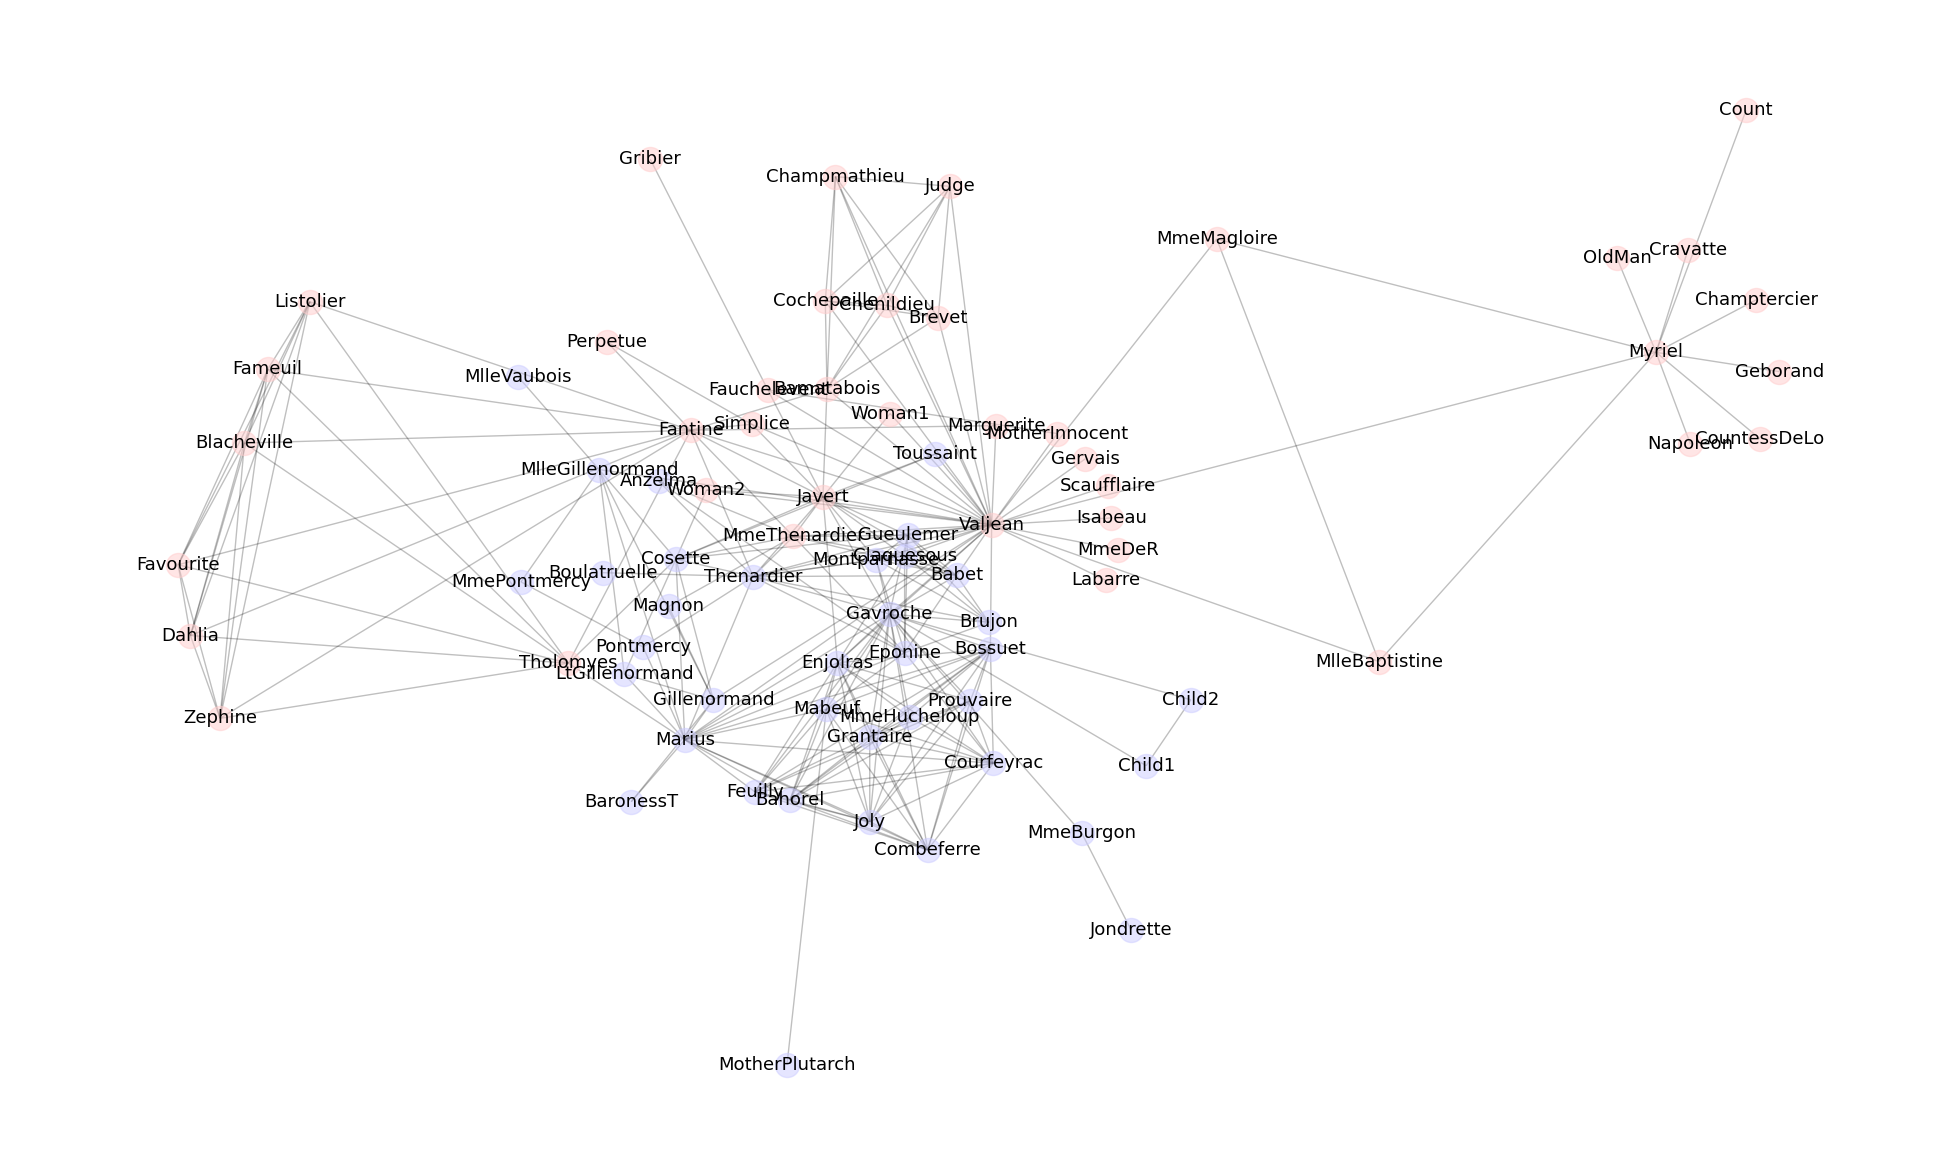

In [17]:
Chegger, Chegger_sorting = ncut_analysis(A)
med = np.sum(Chegger[Chegger_sorting] < 0)
partition_1 = V[Chegger_sorting[:med]]
partition_2 = V[Chegger_sorting[med:]]
visualize_two_partition(partition_1, partition_2, nx.kamada_kawai_layout, G)
plt.savefig("normNcut.pdf")

Transition Path Analysis

In [73]:
idx_Valjean = np.where(V == "Valjean")
idx_Javert = np.where(V == "Javert")
print(idx_Valjean)
print(idx_Javert)
len(V)

(array([10], dtype=int64),)
(array([27], dtype=int64),)


77

In [6]:
VH = V.tolist().copy()
VH.remove("Valjean")
VH.remove("Javert")
VH = ["Valjean", "Javert"] + VH
H = nx.Graph()
H.add_nodes_from(VH)
H.add_edges_from(G.edges(data=True))
VH = np.array(VH)
AH = nx.adjacency_matrix(H).toarray()

In [7]:
DH = np.diag(AH.sum(1))
P = np.linalg.inv(DH) @ AH
constants = np.zeros(len(V))
constants[-1] = 1
station_matrix = np.ones((len(V), len(V)))
station_matrix[:,:-1] = (np.identity(len(V)) - P)[:, :-1]
pi = constants @ np.linalg.inv(station_matrix)

Solve Dirichlet Boundary Problem

In [31]:
Dirichlet_matrix = np.identity(len(V)-2)
Dirichlet_matrix -= P[2:, 2:]
q_partial = np.linalg.inv(Dirichlet_matrix) @ AH[2:,:2] @ np.array([1,0]).reshape((2,1))
q = np.append([1,0], q_partial)
q0 = VH[q <= 0.5]
q1 = VH[q > 0.5]

In [32]:
J = np.zeros((len(V), len(V)))
for i in range(len(V)):
    for j in range(len(V)):
        if i != j:
            J[i,j] = pi[i] * (1 - q[i]) * P[i,j] *q[j]
J_eff = np.zeros((len(V), len(V)))
for i in range(len(V)):
    for j in range(len(V)):
        J_eff[i,j] = max(J[i,j] - J[j,i], 0)

In [33]:
T = np.zeros(len(V))
for i in range(len(V)):
    if i==1:
        T[i] = sum([J_eff[i,j] for j in range(len(V))])
    elif i==0:
        T[i] = sum([J_eff[j,i] for j in range(len(V))])
    else:
        T[i] = sum([J_eff[i,j] for j in range(len(V))])

In [34]:
Flux = nx.DiGraph()
for i in range(len(V)):
    Flux.add_node(VH[i])
    for j in range(len(V)):
        if J_eff[i,j] > 0 :
            Flux.add_edge(VH[i],VH[j])

In [35]:
q0_indices = np.array([np.where(VH == q)[0][0] for q in q0])
q1_indices = np.array([np.where(VH == q)[0][0] for q in q1])

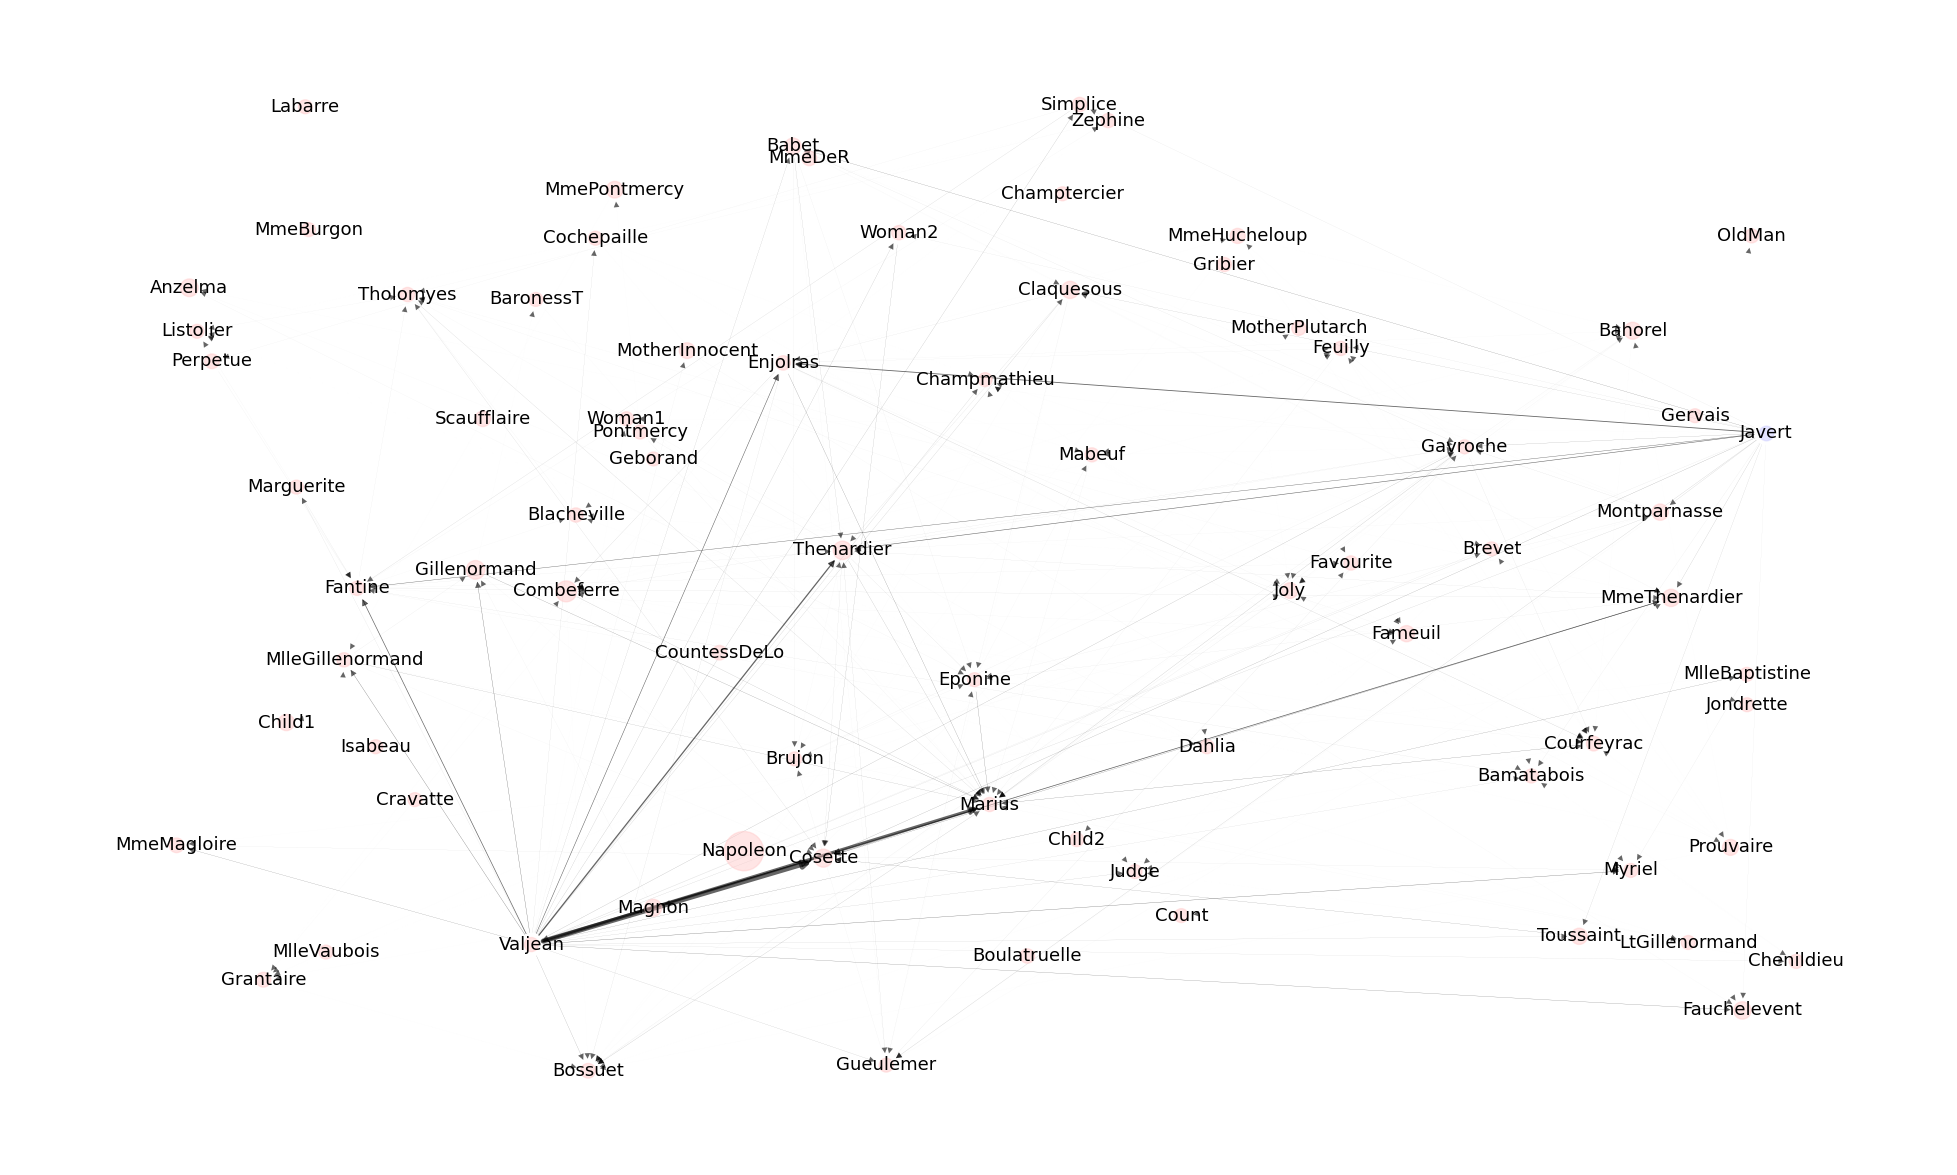

In [37]:
fig,ax = plt.subplots(figsize=(25,15))
ax.axis('off')
pos = nx.random_layout(Flux)
labels = dict([(n, n) for n in Flux.nodes])
nx.draw_networkx_nodes(Flux, pos, nodelist=q0, node_color='#ccccff', alpha=0.5, node_size = 1e3*T[q0_indices-1]+100)
nx.draw_networkx_nodes(Flux, pos, nodelist=q1, node_color='#ffcccc', alpha=0.5, node_size = 1e3*T[q1_indices-1]+100)
nx.draw_networkx_labels(Flux,pos,font_size=13,labels=labels)
for k, e in enumerate(Flux.edges):
    i,j = np.where(VH == e[0])[0][0], np.where(VH == e[1])[0][0]
    nx.draw_networkx_edges(Flux, pos, edgelist=[e], alpha=0.6, width=3.0*J_eff[i,j])
plt.savefig("tpa.pdf")

Multiple Spectral Clustering

In [8]:
P_eigval, P_eigvec = np.linalg.eig(P)
k = 6
sort_by_eigval = np.argsort(-P_eigval)
Y = P_eigvec[:,sort_by_eigval[1:k]].real
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(Y)
kmeans.labels_

c:\Users\gerry\miniconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 5, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 5, 5, 5, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 0, 1, 1, 5, 1])

In [24]:
modncut_partition1 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 0]
modncut_partition2 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 1]
modncut_partition3 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 2]
modncut_partition4 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 3]
modncut_partition5 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 4]
modncut_partition6 = [n for i,n in enumerate(VH) if kmeans.labels_[i] == 5]

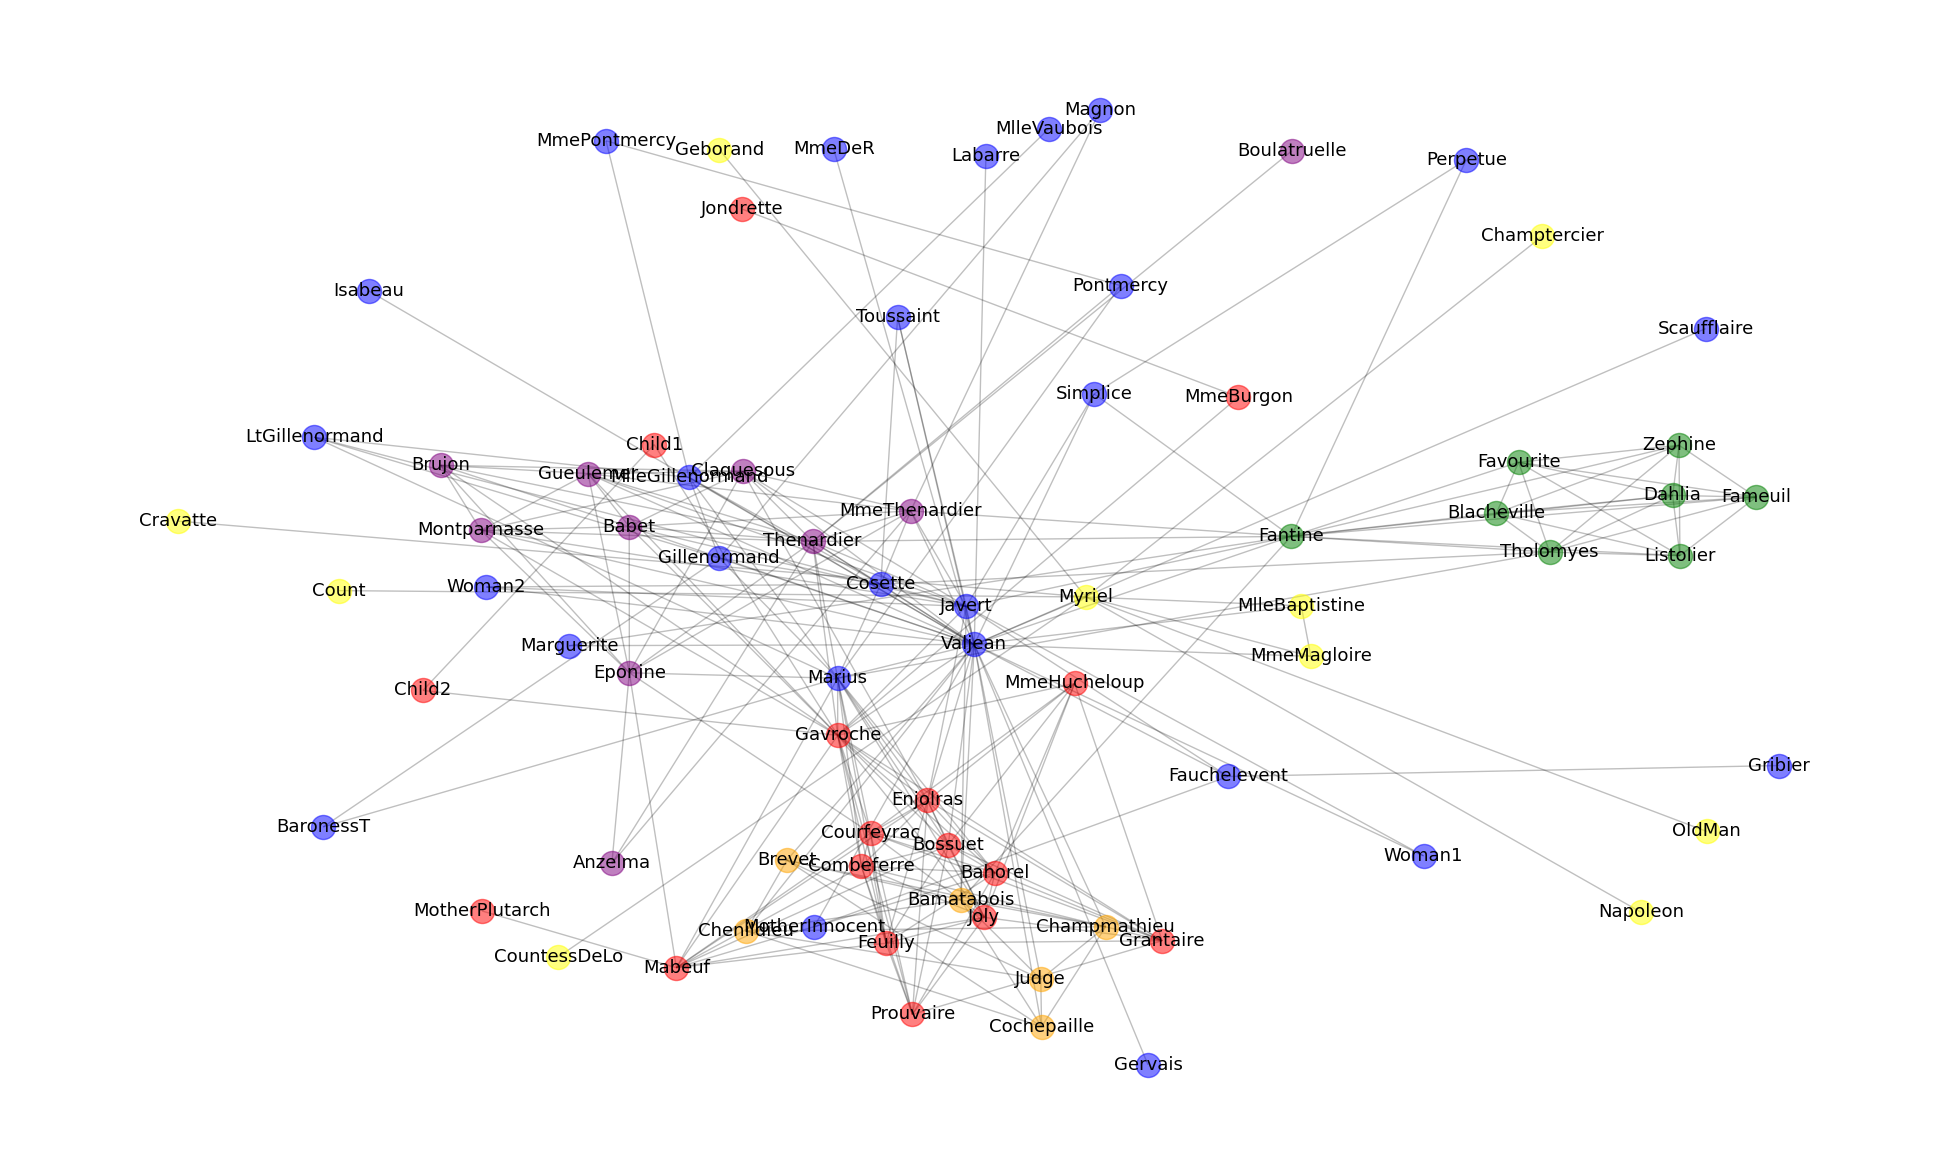

In [9]:
labels = dict([(n, n) for n in H.nodes])
fig,ax = plt.subplots(figsize=(25,15))
ax.axis('off')
pos = nx.fruchterman_reingold_layout(H, k=1.0, iterations=60)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 0], node_color='blue', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 1], node_color='red', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 2], node_color='green', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 3], node_color='yellow', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 4], node_color='orange', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=[n for i,n in enumerate(VH) if kmeans.labels_[i] == 5], node_color='purple', alpha=0.5)
nx.draw_networkx_labels(H,pos,font_size=13,labels=labels)
nx.draw_networkx_edges(H,pos,alpha=0.25)
plt.savefig("modified.pdf")

In [17]:
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(H)
groups = set(partition.values())
louvain_partition = {g:[] for g in groups}
for v in VH:
    louvain_partition[partition[v]].append(v)

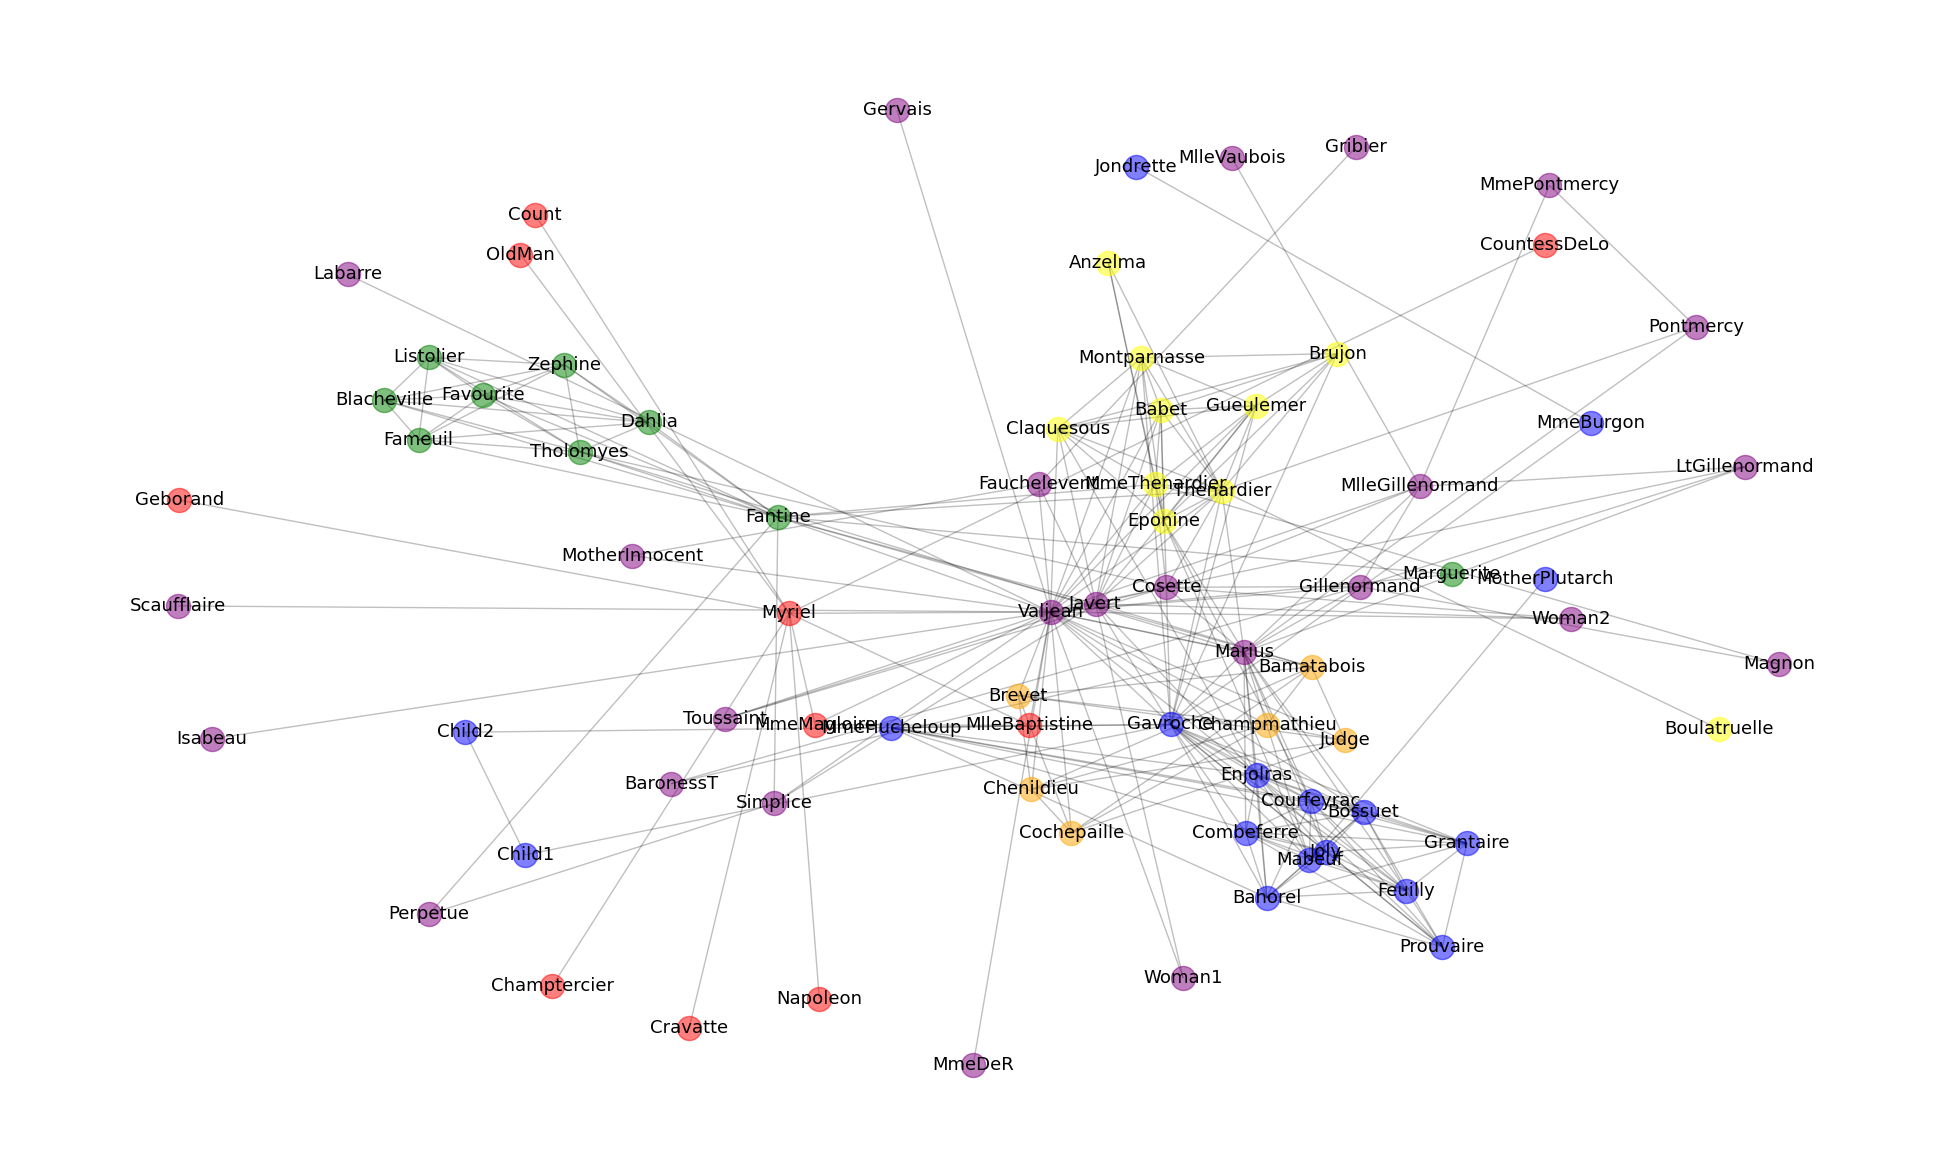

In [18]:
labels = dict([(n, n) for n in H.nodes])
fig,ax = plt.subplots(figsize=(25,15))
ax.axis('off')
pos = nx.fruchterman_reingold_layout(H, k=1.0, iterations=60)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[0], node_color='blue', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[1], node_color='red', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[2], node_color='green', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[3], node_color='yellow', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[4], node_color='orange', alpha=0.5)
nx.draw_networkx_nodes(H, pos, nodelist=louvain_partition[5], node_color='purple', alpha=0.5)
nx.draw_networkx_labels(H,pos,font_size=13,labels=labels)
nx.draw_networkx_edges(H,pos,alpha=0.25)
plt.savefig("louvain.pdf")

Comparing Louvain and Modified Ncut method by considering symmetric difference

In [28]:
print(set(louvain_partition[5]) - set(modncut_partition1))
print(set(modncut_partition1) - set(louvain_partition[5]))

set()
{'Marguerite'}


In [31]:
print(set(louvain_partition[4]) - set(modncut_partition5))
print(set(modncut_partition5) - set(louvain_partition[4]))

set()
set()


In [32]:
print(set(louvain_partition[2]) - set(modncut_partition3))
print(set(modncut_partition3) - set(louvain_partition[2]))

{'Marguerite'}
set()


In [33]:
print(set(louvain_partition[0]) - set(modncut_partition2))
print(set(modncut_partition2) - set(louvain_partition[0]))

set()
set()


In [41]:
print(set(louvain_partition[1]) - set(modncut_partition4))
print(set(modncut_partition4) - set(louvain_partition[1]))

set()
set()


In [37]:
print(set(louvain_partition[3]) - set(modncut_partition6))
print(set(modncut_partition6) - set(louvain_partition[3]))

set()
set()
